In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')
type(nsfg)
# National Survey of Family Growth (NSFG) data: 2013 -2015 dataset

pandas.core.frame.DataFrame

In [2]:
# Inspect the No of Rows and Columns
nsfg.shape

(9358, 10)

In [3]:
# Names of columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [4]:
# Select column 'birthwgt_oz1' as ounces
ounces = nsfg['birthwgt_oz1']
# Inspect the first 5 elements of Ounces
ounces.head()

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

In [5]:
# Select column 'birthwgt_lb1' as pounds
pounds = nsfg['birthwgt_lb1']
# Inspect the first 5 elements of pounds
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

In [6]:
# Inspect counts of weights
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [7]:
# Generate Summary Statistics
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [8]:
# Replace the outliers represeting 'refused' and 'dont know' with NaN
pounds = pounds.replace([98, 99], np.nan)
# Inspect the mean weight in pounds again
pounds.mean()

6.703286384976526

In [9]:
# Replace the outliers in ounces, use 'inplace=True' to modify the existing series without having to make a new copy
ounces.replace([98, 99], np.nan, inplace=True)

In [10]:
# Get total weight by adding the weights in a uniform unit (lbs)
birth_weight = pounds + ounces/16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [11]:
# Inspect the column 'nbrnaliv' for no of babies born alive at the end of a pregnancy
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [12]:
# Replace 8 indicating from the code book that the 'respondent refused to answer' with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

In [13]:
# Get the ages at conception and at the end of the pregnancy from the cols 'agecon' and 'agepreg'
nsfg[['agecon','agepreg']].head()
# Divide them by 100 because they are recorded as integers with two implicit decimals (i.e 2575 == age 25.75)
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100
# Compute the difference in agepreg and agecon as the duration of the pregnancy('preg_length)
preg_length = agepreg - agecon
preg_length.head()

0    0.75
1    0.67
2    0.67
3     NaN
4    0.75
dtype: float64

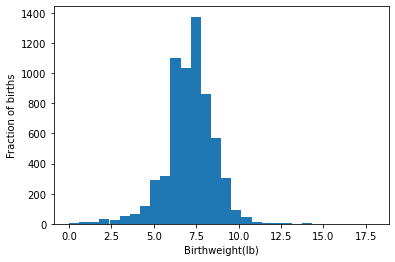

In [14]:
# Visualize the distribution of birthweights, specify the bins/range into 30
plt.hist(birth_weight.dropna(), bins=30)
plt.xlabel('Birthweight(lb)')
plt.ylabel('Fraction of births')
plt.show()

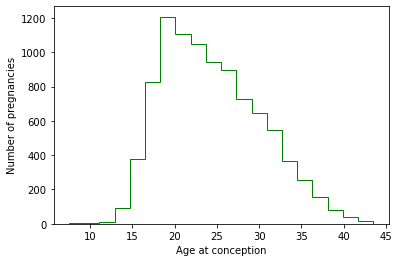

In [15]:
#Visualize the distribution of ages of women at conception, bins = 20
plt.hist(agecon, bins=20, histtype= 'step', color='green')
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')
plt.show()

In [16]:
# Determine the sum of babies that were born preterm (i.e born before 37 weeks of pregnancy)
preterm = nsfg['prglngth'] < 37  #gives a boolean series
preterm.sum() #sum of all trues
preterm.mean() #avg value of trues

0.39987176747168196

In [17]:
# Get the mean weight of preterm babies
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [18]:
# Get the mean weight of full term babies by using not (~) on preterm
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

In [19]:
# Compute birth_weight for Single full term babies
single_full_term_babies = nsfg['nbrnaliv'] == 1
single_full_term_weight = birth_weight[single_full_term_babies & ~preterm]
print('Single full-term mean weight:', single_full_term_weight.mean())

Single full-term mean weight: 7.385643450184502


In [20]:
# Compute birth_weight for Multiple full term babies
multiple_full_term_weight = birth_weight[~single_full_term_babies & ~preterm]
print('Multiple full-term mean weight:', multiple_full_term_weight.mean())

Multiple full-term mean weight: 5.768055555555556
